<a href="https://colab.research.google.com/github/neetinds/Capstone3/blob/main/Capstone3_Data_science_Analytics_Data__Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To identify the factors that lead to attrition with the goal of building a model that uses credentials of the candidate and various demographics factors to predict the probability of a candidate to look out for new jobs or remain at the company. Using modeling technique like clustering, classification, smote, xgboost-classifier etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Mount the gdrive to load the data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Data Acquisition

##Load Train data set

In [3]:
train=pd.read_csv('/content/gdrive/MyDrive/Springboard-master/Capstone 3/aug_train.csv')
train=train.sample(frac=1,random_state=10).reset_index().drop('index',axis=1)
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,20753,city_1,0.847,Male,No relevent experience,Full time course,High School,NaN,4,10000+,Pvt Ltd,1,114,0.0
1,27035,city_167,0.921,Male,Has relevent experience,Full time course,Masters,STEM,5,100-500,Pvt Ltd,1,10,0.0
2,21753,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,STEM,3,10000+,Pvt Ltd,1,214,0.0
3,27579,city_97,0.925,Male,Has relevent experience,Full time course,Graduate,STEM,9,100-500,Public Sector,1,111,0.0
4,22405,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,500-999,Pvt Ltd,4,60,0.0


##Check rows/col's

In [4]:
train.shape

(19158, 14)

##Check datatype of data




In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Dealing with missing values - Null/missing values across col's

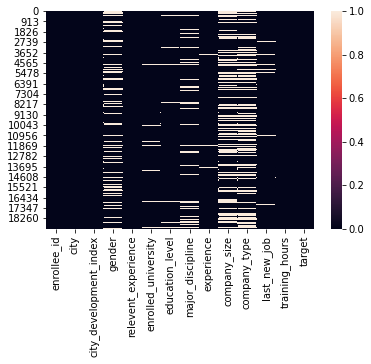

In [6]:
# Total Null values in the data set
sns.heatmap(train.isnull())
plt.show()

In [7]:
# Proportion of Null values in each column
propnull=train.isnull().sum()/len(train)
propnull

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

##Sampling : Remove samples from col's where they are less than 10%

In [8]:
# Removing samples with null values in columns containing less than 10% null values
sub=propnull[(propnull>0) & (propnull<0.1)].index
train.dropna(subset=sub,inplace=True)
train.shape

(18014, 14)